In [1]:
import math
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Set some directories. Here we use absolute directories. 
cwd = 'c:\\Users\\m1865\\Desktop\\Ticino'
cwd_Field = cwd + '\\FieldData'
cwd_Field_Data2 = cwd_Field + '\\Field Dataset 2'
cwd_Result = cwd + '\\Results'


In [3]:
# Since our Excel file contains multiple sheets, we need to get the names of sheets firstly. 
xlsx = pd.ExcelFile(cwd_Field_Data2 + '\\Dati plot forestali Parco Ticino completo.xlsx')
xlsx.sheet_names

['Querce caducifoglie',
 'Acero-fra, Orno-ost',
 'Castagneti',
 'Pinete con lat',
 'Lat alloctone',
 'Lat meso con conifere',
 'TEMPLATE']

In [4]:
# Combine! 
xlsx_field = pd.DataFrame()
for sheet in xlsx.sheet_names:
    if sheet != 'TEMPLATE':
        temp_df = pd.read_excel(cwd_Field_Data2 + '\\Dati plot forestali Parco Ticino completo.xlsx', sheet_name=sheet)
        xlsx_field = pd.concat([xlsx_field, temp_df], ignore_index=True)
xlsx_field

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Tipo forestale:,NaN,Querce caducifoglie (colore rosso),NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,ha factor,31.830989,NaN,NaN,NaN,NaN
3,Radius [m],10,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
972,40,9,casa,25.5,NaN,NaN
973,40,10,prse,10.5,NaN,NaN
974,40,11,quro,41.5,NaN,NaN
975,40,12,quro,48,NaN,NaN


In [5]:
# By observing our concatenated dataframe, we only need to keep the first 3 columns. 
# Drop those columns! 
xlsx_field = xlsx_field.drop(xlsx_field.iloc[:,np.r_[1,np.arange(3,6,1)]], axis = 1)
xlsx_field

,Unnamed: 0,Unnamed: 2
0,Tipo forestale:,Querce caducifoglie (colore rosso)
1,NaN,NaN
2,ha factor,NaN
3,Radius [m],NaN
4,NaN,NaN
...,...,...
972,40,casa
973,40,prse
974,40,quro
975,40,quro


In [6]:
# Now we need to drop the useless rows. If the first column of a row is not a numeric value, then it will be dropped. 
df_field = xlsx_field
for row in range(0,xlsx_field.shape[0]):
    # Get the index label of the current row! 
    temp_label = xlsx_field.iloc[row].name
    if str(xlsx_field.iloc[row,0]).isnumeric(): # Note: we have to convert the value to str first, otherwise we can't apply "isnumeric()" function. 
        continue
    else: 
        # Drop the row based on the label! 
        df_field = df_field.drop(index=temp_label, axis = 0)
# Reset index
df_field = df_field.reset_index(drop = True)
# Assign column names
df_field.columns = ["Plot Number", "Tree Species"]
# Finally we get our dataframe! 
df_field

,Plot Number,Tree Species
0,1,quru
1,1,pisy
2,1,quru
3,1,quru
4,1,quru
...,...,...
834,40,casa
835,40,prse
836,40,quro
837,40,quro


In [7]:
# Now we need to calculate the quantity of species in each plot! 
ds_count = df_field.groupby("Plot Number").count().iloc[:,0]
ds_count

Plot Number
1      9
2     27
3     27
4     36
5     18
6     23
7     16
8     16
9     24
10    20
11    17
12    35
13    22
14    10
15    30
16    28
17    17
18    19
19    29
20    20
21    19
22    15
23    19
24    14
25    23
26     8
27    26
28    24
29    14
30    15
31    10
32    50
33    30
34    27
35    14
36    23
37    12
38    21
39    19
40    13
Name: Tree Species, dtype: int64

In [8]:
# Get the quantities of each species in each field plot! 
df_field_count = df_field.groupby(["Plot Number","Tree Species"], as_index = False).size()
df_field_count = df_field_count.rename(columns={'size': 'Species Count'})
df_field_count

,Plot Number,Tree Species,Species Count
0,1,pisy,2
1,1,quru,7
2,2,pisy,1
3,2,prse,12
4,2,quro,5
...,...,...,...
149,39,pisy,7
150,40,casa,2
151,40,pisy,2
152,40,prse,6


In [9]:
# Add the total counts of all the species in each plot field into the dataframe! 
for row in range(0,df_field_count.shape[0]):
    df_field_count.loc[row,'Total Count'] = ds_count.loc[df_field_count.iloc[row]['Plot Number']]
df_field_count['Total Count'] = df_field_count['Total Count'].astype('int64')
df_field_count

,Plot Number,Tree Species,Species Count,Total Count
0,1,pisy,2,9
1,1,quru,7,9
2,2,pisy,1,27
3,2,prse,12,27
4,2,quro,5,27
...,...,...,...,...
149,39,pisy,7,19
150,40,casa,2,13
151,40,pisy,2,13
152,40,prse,6,13


In [10]:
df_field_shannon = df_field_count.copy()
df_field_shannon['pi'] = df_field_shannon['Species Count'] / df_field_shannon['Total Count']
df_field_shannon['-pilnpi'] = df_field_shannon['pi'] * np.log(df_field_shannon['pi']) * (-1)
df_field_shannon

,Plot Number,Tree Species,Species Count,Total Count,pi,-pilnpi
0,1,pisy,2,9,0.222222,0.334239
1,1,quru,7,9,0.777778,0.195467
2,2,pisy,1,27,0.037037,0.122068
3,2,prse,12,27,0.444444,0.360413
4,2,quro,5,27,0.185185,0.312296
...,...,...,...,...,...,...
149,39,pisy,7,19,0.368421,0.367879
150,40,casa,2,13,0.153846,0.287970
151,40,pisy,2,13,0.153846,0.287970
152,40,prse,6,13,0.461538,0.356857


In [11]:
df_field_shannon_final = df_field_shannon.groupby('Plot Number', as_index= False).sum().drop(columns=["Tree Species","Total Count","pi"])
df_field_shannon_final = df_field_shannon_final.rename(columns={"-pilnpi": "Shannon Index", "Species Count": "Total Count"})
df_field_shannon_final

,Plot Number,Total Count,Shannon Index
0,1,9,0.529706
1,2,27,1.277259
2,3,27,1.086655
3,4,36,1.334475
4,5,18,1.365077
5,6,23,1.187775
6,7,16,0.984087
7,8,16,1.263741
8,9,24,1.212466
9,10,20,0.790987


In [12]:
# Read another Excel file which contains all the geographical coordinates of the field plots! 
df_field_coord = pd.read_excel(cwd_Field_Data2 + "\\Dati coordinate plot forestali Parco Ticino.xlsx")
df_field_coord

,n° plot,Y,X
0,1,45.712265,8.757804
1,2,45.702801,8.750167
2,3,45.639628,8.666780
3,4,45.630213,8.667770
4,5,45.552661,8.703548
5,6,45.542031,8.705301
6,7,45.536410,8.704414
7,8,45.507882,8.706822
8,9,45.705440,8.675570
9,10,45.705992,8.660657


In [13]:
# Rename the columns !
df_field_coord.columns = ["Plot Number", "Latitude", "Longitude"]
df_field_coord

,Plot Number,Latitude,Longitude
0,1,45.712265,8.757804
1,2,45.702801,8.750167
2,3,45.639628,8.666780
3,4,45.630213,8.667770
4,5,45.552661,8.703548
5,6,45.542031,8.705301
6,7,45.536410,8.704414
7,8,45.507882,8.706822
8,9,45.705440,8.675570
9,10,45.705992,8.660657


In [14]:
# Merge! 
df_field_merged = pd.merge(df_field_shannon_final, df_field_coord, on = "Plot Number")
df_field_merged

,Plot Number,Total Count,Shannon Index,Latitude,Longitude
0,1,9,0.529706,45.712265,8.757804
1,2,27,1.277259,45.702801,8.750167
2,3,27,1.086655,45.639628,8.666780
3,4,36,1.334475,45.630213,8.667770
4,5,18,1.365077,45.552661,8.703548
5,6,23,1.187775,45.542031,8.705301
6,7,16,0.984087,45.536410,8.704414
7,8,16,1.263741,45.507882,8.706822
8,9,24,1.212466,45.705440,8.675570
9,10,20,0.790987,45.705992,8.660657


In [15]:
gdf_Shannon = gpd.GeoDataFrame(
    df_field_merged,
    geometry = gpd.points_from_xy(df_field_merged['Longitude'],df_field_merged['Latitude']),
    crs = 'EPSG:4326'
)
# Convert the crs from 4326 (WGS84) to 32632 (WGS84 UTM zone 32N)
gdf_Shannon = gdf_Shannon.to_crs(32632)
gdf_Shannon

,Plot Number,Total Count,Shannon Index,Latitude,Longitude,geometry
0,1,9,0.529706,45.712265,8.757804,POINT (481149.210 5062107.523)
1,2,27,1.277259,45.702801,8.750167,POINT (480551.551 5061057.811)
2,3,27,1.086655,45.639628,8.666780,POINT (474030.984 5054062.994)
3,4,36,1.334475,45.630213,8.667770,POINT (474103.856 5053016.615)
4,5,18,1.365077,45.552661,8.703548,POINT (476860.756 5044389.695)
5,6,23,1.187775,45.542031,8.705301,POINT (476993.249 5043208.309)
6,7,16,0.984087,45.536410,8.704414,POINT (476921.679 5042584.060)
7,8,16,1.263741,45.507882,8.706822,POINT (477098.139 5039413.959)
8,9,24,1.212466,45.705440,8.675570,POINT (474745.660 5061371.891)
9,10,20,0.790987,45.705992,8.660657,POINT (473585.098 5061437.965)


In [16]:
gdf_Shannon_Buffer = gdf_Shannon.copy()
meter_Buffer = 10
gdf_Shannon_Buffer['geometry'] = gdf_Shannon_Buffer.geometry.buffer(meter_Buffer, cap_style = 3)

In [36]:
n_Plot = 1
xmin = gdf_Shannon_Buffer.bounds.iloc[n_Plot,0]
ymin = gdf_Shannon_Buffer.bounds.iloc[n_Plot,1]
xmax = gdf_Shannon_Buffer.bounds.iloc[n_Plot,2]
ymax = gdf_Shannon_Buffer.bounds.iloc[n_Plot,3]
xmin

480541.550681673

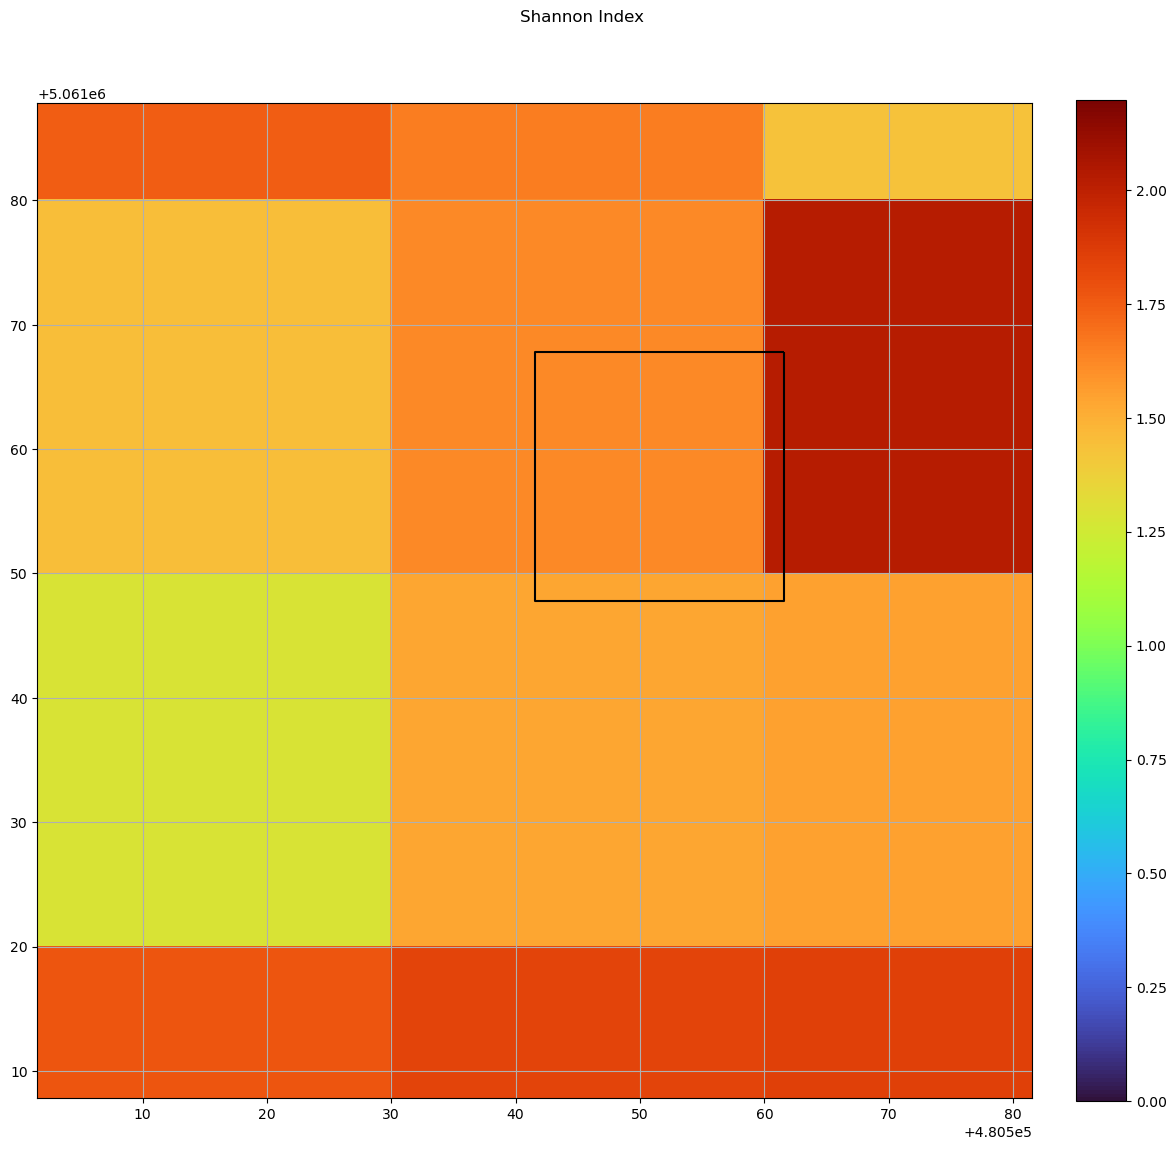

In [37]:
from osgeo import gdal
import rasterio as rio
from rasterio.plot import show
res_Raster_Shannon = 3
temp = rio.open(cwd_Result + "\\" + "2022 06Cropped" + "\\SPCA\\Alpha\\Shannon_" + str(res_Raster_Shannon))
fig, ax = plt.subplots(1, figsize = (12, 12))
image_hidden = ax.imshow(temp.read()[0], 
                        cmap='turbo')
gdf_Shannon_Buffer.boundary.plot(ax = ax, color='black')
show(temp, ax = ax, cmap = 'turbo')
fig.suptitle("Shannon Index")
fig.colorbar(image_hidden, ax=ax, fraction=0.046, pad=0.04)
fig.tight_layout()
ax.set_xlim(xmin - 2*(xmax - xmin), xmin + 2*(xmax-xmin))
ax.set_ylim(ymin - 2*(ymax - ymin), ymin + 2*(ymax-ymin))
# plt.xticks(np.arange(xmin - 2*(xmax - xmin) - 6 - 20, xmin + 2*(xmax-xmin) - 6 - 20, 100))
# plt.yticks(np.arange(ymin - 2*(ymax - ymin) - 4 + 10, ymin + 2*(ymax-ymin) - 4, 100))
plt.grid()

In [22]:
# Read the Shannon index in our raster! 
raster_Shannon = temp.read(1)
# Get the bounds of our raster! 
raster_xmin = temp.bounds[0]
raster_ymin = temp.bounds[1]
temp.bounds

BoundingBox(left=440810.0, bottom=5000570.0, right=509630.0, top=5069420.0)

In [35]:
# Now we need to check for each field plot polygon that how many "raster grids" each field plot overlaps. 
res_Satellite = 10
res_Pixel = res_Satellite * res_Raster_Shannon
list_RasterShannon = []
for n in range(0,gdf_Shannon_Buffer.shape[0]): 
    print("This is the number " + str(n) + " plot!")
    xmin = gdf_Shannon_Buffer.bounds.iloc[n,0]
    ymin = gdf_Shannon_Buffer.bounds.iloc[n,1]
    xmax = gdf_Shannon_Buffer.bounds.iloc[n,2]
    ymax = gdf_Shannon_Buffer.bounds.iloc[n,3]
    # Get the x value in the raster
    left_x = math.floor(xmax/res_Pixel)*res_Pixel + 20 if xmax > (math.floor(xmax/res_Pixel)*res_Pixel + 20) else math.floor(xmax/res_Pixel)*res_Pixel - 10
    # Get the y value in the raster
    top_y = math.floor(ymax/res_Pixel)*res_Pixel + 20 if ymax > (math.floor(ymax/res_Pixel)*res_Pixel + 20) else math.floor(ymax/res_Pixel)*res_Pixel - 10
    # Check how many pixels the field plot overlaps
    if xmin < left_x and ymin < top_y:
        print("This field plot overlaps 4 raster pixels!")
        print("The bottomleft raster pixel topleft coordinate is (" + str(left_x - res_Pixel) + "," + str(top_y) + ")")
        print("The topleft raster pixel topleft coordinate is (" + str(left_x - res_Pixel) + "," + str(top_y + res_Pixel) + ")")
        print("The bottomright raster pixel topleft coordinate is (" + str(left_x) + "," + str(top_y) + ")")
        print("The topright raster pixel topleft coordinate is (" + str(left_x) + "," + str(top_y + res_Pixel) + ")")
        row1, col1 = temp.index(left_x - res_Pixel, top_y)
        row2, col2 = temp.index(left_x - res_Pixel, top_y + res_Pixel)
        row3, col3 = temp.index(left_x, top_y)
        row4, col4 = temp.index(left_x, top_y + res_Pixel)
        temp_Shannon_BLeft = raster_Shannon[row1,col1]
        temp_Shannon_TLeft = raster_Shannon[row2,col2]
        temp_Shannon_BRight = raster_Shannon[row3,col3]
        temp_Shannon_TRight = raster_Shannon[row4,col4]
        print("The bottomleft raster Shannon index is equal to " + str(temp_Shannon_BLeft))
        print("The topleft raster Shannon index is equal to " + str(temp_Shannon_TLeft))
        print("The bottomright raster Shannon index is equal to " + str(temp_Shannon_BRight))
        print("The topright raster Shannon index is equal to " + str(temp_Shannon_TRight))
        temp_Shannon_BLeft_weight = (left_x - xmin) * (top_y - ymin) / (meter_Buffer * 2) ** 2
        temp_Shannon_TLeft_weight = (left_x - xmin) * (ymax - top_y) / (meter_Buffer * 2) ** 2
        temp_Shannon_BRight_weight = (xmax - left_x) * (top_y - ymin) / (meter_Buffer * 2) ** 2
        temp_Shannon_TRight_weight = (xmax - left_x) * (ymax - top_y) / (meter_Buffer * 2) ** 2
        temp_Shannon_Final = temp_Shannon_BLeft * temp_Shannon_BLeft_weight + temp_Shannon_TLeft * temp_Shannon_TLeft_weight + temp_Shannon_BRight * temp_Shannon_BRight_weight + temp_Shannon_TRight * temp_Shannon_TRight_weight
        list_RasterShannon.append(temp_Shannon_Final)

    elif xmin < left_x and not (ymin < top_y):
        print("This field plot overlaps 2 horizontal raster pixels!")
        print("The left raster pixel topleft coordinate is (" + str(left_x - res_Pixel) + "," + str(top_y + res_Pixel) + ")")
        print("The right raster pixel topleft coordinate is (" + str(left_x) + "," + str(top_y + res_Pixel) + ")")
        row1, col1 = temp.index(left_x - res_Pixel, top_y + res_Pixel)
        row2, col2 = temp.index(left_x, top_y + res_Pixel)
        temp_Shannon_Left = raster_Shannon[row1,col1]
        temp_Shannon_Right = raster_Shannon[row2,col2]
        # print("The left raster pixel index is (" + str(row1) + "," + str(col1) + ") and right is (" + str(row2) + "," + str(col2) + ")")
        print("The left raster Shannon index is equal to " + str(temp_Shannon_Left))
        print("The right raster Shannon index is equal to " + str(temp_Shannon_Right))
        temp_Shannon_Left_weight = (left_x - xmin) / (meter_Buffer * 2)
        temp_Shannon_Right_weight = (xmax - left_x) / (meter_Buffer * 2)
        temp_Shannon_Final = temp_Shannon_Left * temp_Shannon_Left_weight + temp_Shannon_Right * temp_Shannon_Right_weight
        list_RasterShannon.append(temp_Shannon_Final)
    elif not (xmin < left_x) and ymin < top_y:
        print("This field plot overlaps 2 vertical raster pixels!")
        print("The bottom raster pixel topleft coordinate is (" + str(left_x) + "," + str(top_y) + ")")
        print("The top raster pixel topleft coordinate is (" + str(left_x) + "," + str(top_y + res_Pixel) + ")")
        row1, col1 = temp.index(left_x, top_y)
        row2, col2 = temp.index(left_x, top_y + res_Pixel)
        temp_Shannon_Bottom = raster_Shannon[row1,col1]
        temp_Shannon_Top = raster_Shannon[row2,col2]
        # print("The bottom raster pixel index is (" + str(row1) + "," + str(col1) + ") and top is (" + str(row2) + "," + str(col2) + ")")
        print("The bottom raster Shannon index is equal to " + str(temp_Shannon_Bottom))
        print("The top raster Shannon index is equal to " + str(temp_Shannon_Top))
        temp_Shannon_Bottom_weight = (top_y - ymin) / (meter_Buffer * 2)
        temp_Shannon_Top_weight = (ymax - top_y) / (meter_Buffer * 2)
        temp_Shannon_Final = temp_Shannon_Bottom * temp_Shannon_Bottom_weight + temp_Shannon_Top * temp_Shannon_Top_weight
        list_RasterShannon.append(temp_Shannon_Final)
    elif not (xmin < left_x) and not (ymin < top_y):
        print("This field plot only overlaps 1 raster pixel!")
        print("The raster pixel topleft coordinate is (" + str(left_x) + "," + str(top_y + res_Pixel) + ")")
        row, col = temp.index(left_x, top_y + res_Pixel)
        # print("The raster pixel index is (" + str(row) + "," + str(col) + ")")
        print("The raster Shannon index is equal to " + str(raster_Shannon[row,col]))
        list_RasterShannon.append(raster_Shannon[row,col])
    print("--------")

This is the number 0 plot!
This field plot overlaps 2 vertical raster pixels!
The bottom raster pixel topleft coordinate is (481130,5062100)
The top raster pixel topleft coordinate is (481130,5062130)
The bottom raster Shannon index is equal to 0.71983457
The top raster Shannon index is equal to 0.8671273
--------
This is the number 1 plot!
This field plot overlaps 4 raster pixels!
The bottomleft raster pixel topleft coordinate is (480530,5061050)
The topleft raster pixel topleft coordinate is (480530,5061080)
The bottomright raster pixel topleft coordinate is (480560,5061050)
The topright raster pixel topleft coordinate is (480560,5061080)
The bottomleft raster Shannon index is equal to 1.5325445
The topleft raster Shannon index is equal to 1.6165445
The bottomright raster Shannon index is equal to 1.5496016
The topright raster Shannon index is equal to 2.020087
--------
This is the number 2 plot!
This field plot overlaps 2 vertical raster pixels!
The bottom raster pixel topleft coord

In [38]:
# Now we get a list where the values of the Shannon index calculated from our raster file for each plot is saved! 
list_RasterShannon

[0.8488848595658582,
 1.635359833866129,
 1.0923865421266923,
 1.1371221546741244,
 1.4207638905025992,
 1.6200667623292089,
 1.2813743953520222,
 1.6321110263718435,
 1.666932865577024,
 1.3182308672468026,
 1.6473281904883141,
 1.6375057175394678,
 1.1644790465842518,
 1.264436393084355,
 1.4125327416644364,
 1.8076838884302238,
 nan,
 nan,
 nan,
 nan,
 1.7424451422115461,
 1.7576700916985657,
 1.6874478834156061,
 1.6115044685958515,
 1.8667786136371132,
 nan,
 1.1618338313719898,
 1.3527818163563488,
 1.6733629,
 1.6025210515409578,
 nan,
 1.0028385728355778,
 1.5555965450209506,
 1.4199925008267635,
 1.6424057,
 nan,
 1.214911560994129,
 1.4306903669989814,
 0.6877687,
 1.2997251469985736]

In [39]:
# Convert out list to a dataframe! 
df_raster_Shannon = pd.DataFrame(
    data = {
        'Plot Number': df_field_shannon_final['Plot Number'],
        'Raster Shannon Index': list_RasterShannon
    }
)
df_raster_Shannon

,Plot Number,Raster Shannon Index
0,1,0.848885
1,2,1.635360
2,3,1.092387
3,4,1.137122
4,5,1.420764
5,6,1.620067
6,7,1.281374
7,8,1.632111
8,9,1.666933
9,10,1.318231


In [40]:
df_Comparison = pd.merge(df_field_shannon_final, df_raster_Shannon, on = 'Plot Number')
df_Comparison = df_Comparison.dropna().reset_index(drop = True).drop(columns=['Total Count']).rename(columns={"Shannon Index": "Field Shannon Index"})
df_Comparison

,Plot Number,Field Shannon Index,Raster Shannon Index
0,1,0.529706,0.848885
1,2,1.277259,1.635360
2,3,1.086655,1.092387
3,4,1.334475,1.137122
4,5,1.365077,1.420764
5,6,1.187775,1.620067
6,7,0.984087,1.281374
7,8,1.263741,1.632111
8,9,1.212466,1.666933
9,10,0.790987,1.318231


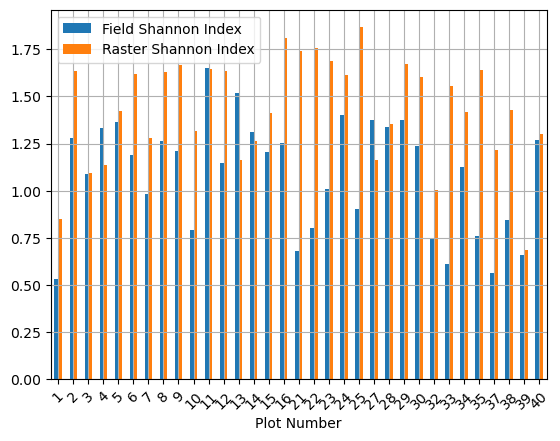

In [41]:
df_Comparison.plot(x = 'Plot Number', y = ['Field Shannon Index', 'Raster Shannon Index'], kind = 'bar')
plt.xticks(rotation = 45)
plt.grid()
plt.show()

In [42]:
# Calculate some statistics
raster_Mean = df_Comparison['Raster Shannon Index'].mean()
raster_Max = df_Comparison['Raster Shannon Index'].max()
raster_Min = df_Comparison['Raster Shannon Index'].min()
raster_Med = df_Comparison['Raster Shannon Index'].median()
raster_STD = df_Comparison['Raster Shannon Index'].std()
field_Mean = df_Comparison['Field Shannon Index'].mean()
field_Max = df_Comparison['Field Shannon Index'].max()
field_Min = df_Comparison['Field Shannon Index'].min()
field_Med = df_Comparison['Field Shannon Index'].median()
field_STD = df_Comparison['Field Shannon Index'].std()


In [43]:
df_Statistics = pd.DataFrame(
    data = {
        'Field Shannon Index': [field_Mean, field_Max, field_Min, field_Med, field_STD],
        'Raster Shannon Index': [raster_Mean, raster_Max, raster_Min, raster_Med, raster_STD]
    },
    index = ['Mean', 'Max', 'Min', 'Median', 'STD']
)
df_Statistics

,Field Shannon Index,Raster Shannon Index
Mean,1.085244,1.433257
Max,1.649989,1.866779
Min,0.529706,0.687769
Median,1.187775,1.430690
STD,0.299987,0.284916


In [44]:
# Null hypothesis! 
from scipy.stats import ttest_ind
t_stat, pvalue = ttest_ind(df_Comparison['Field Shannon Index'], df_Comparison['Raster Shannon Index'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Shannon Index and Raster Shannon Index!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")

-4.832142476582281
8.801334745246771e-06
We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Shannon Index and Raster Shannon Index!


<Axes: xlabel='Field Shannon Index'>

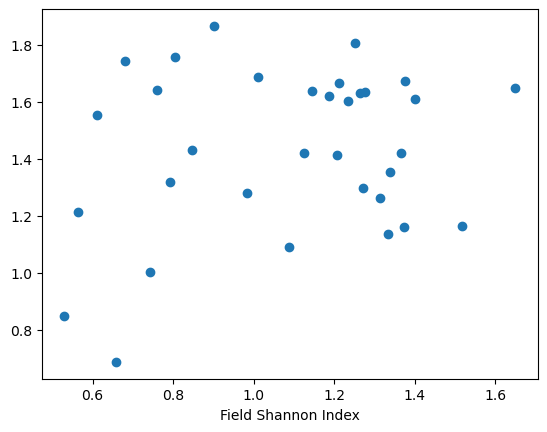

In [45]:
df_Comparison.plot(x = 'Field Shannon Index', y = 'Raster Shannon Index', style = 'o', legend = False)

In [46]:
# Pearson correlation
from scipy import stats
res = stats.pearsonr(df_Comparison['Field Shannon Index'], df_Comparison['Raster Shannon Index'])
res

PearsonRResult(statistic=0.22816319846366667, pvalue=0.2015727922010332)